Exploratory Data Analysis

Some of following codes were extracted from [[1]].

[1]: https://github.com/achab

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from transform import one_hot_dataframe, scale_dataframe, impute_dataframe

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test_2.csv')
print("train size: ", train.shape)
print("test size: ", test.shape)

('train size: ', (40000, 211))
('test size: ', (120000, 147))


In [4]:
train, test = impute_dataframe(train, test)
#train, val = train_test_split(train, test_size=0.4)
#train, val = impute_dataframe(train, val)

In [5]:
train.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,3.59025,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,3.59025,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.00000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [6]:
test.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,1,1.00000,1.412783,-0.056284,0.407434,10.0,0.413226,18871,0.2138,11.0,...,0.000370,-0.000762,-0.000026,0.000366,-2.443829e-03,-0.001301,-0.000917,0.000762,-0.000556,0.000759
1,2,3.45499,-0.112675,0.907973,1.002425,7.0,-0.257825,5852,0.2138,13.0,...,0.000457,0.000003,-0.000007,-0.000003,-1.249010e-05,-0.000463,-0.000003,-0.000002,0.000468,-0.000012
2,3,3.45499,-0.607583,1.076668,0.517865,5.0,0.947340,76935,0.0105,10.0,...,0.000003,0.000157,-0.000181,0.000003,4.108380e-08,0.000164,0.000353,0.000704,-0.000168,-0.000006
3,4,3.45499,2.230240,0.223222,0.407434,1.0,0.439345,84573,0.3318,13.0,...,0.000010,-0.000792,-0.000479,0.000017,1.700924e-04,-0.001079,0.000320,0.000006,0.001392,-0.001850
4,5,3.45499,0.360399,0.597896,-0.145497,10.0,0.275744,89615,0.0099,8.0,...,0.000447,0.000489,-0.000233,-0.000495,5.728556e-05,-0.000050,-0.000011,-0.000377,0.000227,-0.000114


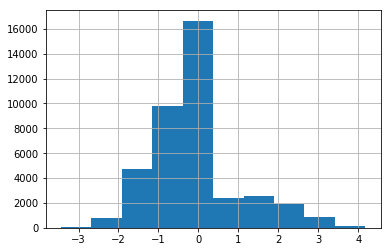

In [7]:
train['Feature_2'].hist()

In [9]:
returns = train.loc[:,'Ret_2':'Ret_180']
returns = returns.apply(lambda a: a.astype(float), axis=1)
log_prices = returns.cumsum()

In [11]:
returns.describe()

,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,...,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180
count,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,...,4.000000e+04,40000.000000,40000.000000,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000
mean,5.600930e-06,-0.000008,-0.000006,-0.000006,-0.000019,0.000030,0.000028,4.696042e-07,0.000004,-0.000004,...,6.297943e-06,-0.000032,0.000034,-1.729004e-05,0.000049,-3.580980e-06,-9.675766e-06,-1.268935e-05,-0.000017,-0.000057
std,9.375506e-04,0.000960,0.000979,0.000947,0.000909,0.000992,0.000907,9.359933e-04,0.000972,0.000964,...,1.267855e-03,0.001304,0.001161,1.148816e-03,0.001115,1.166019e-03,1.248956e-03,1.217967e-03,0.001208,0.001270
min,-1.311777e-02,-0.038542,-0.040386,-0.030359,-0.024735,-0.056589,-0.019753,-2.955805e-02,-0.030077,-0.015547,...,-8.013326e-02,-0.030744,-0.024382,-4.849509e-02,-0.018048,-1.786752e-02,-3.526027e-02,-4.864099e-02,-0.037215,-0.058046
25%,-3.086969e-04,-0.000310,-0.000307,-0.000310,-0.000315,-0.000278,-0.000289,-2.896878e-04,-0.000301,-0.000297,...,-3.718148e-04,-0.000437,-0.000353,-3.790673e-04,-0.000316,-3.943210e-04,-4.091851e-04,-3.649676e-04,-0.000361,-0.000413
50%,4.050692e-07,-0.000002,-0.000002,-0.000002,-0.000002,0.000003,0.000002,4.696042e-07,0.000002,-0.000002,...,8.790193e-07,-0.000001,0.000002,1.489203e-07,0.000004,-4.039616e-07,4.016833e-07,6.407432e-07,0.000001,-0.000002
75%,2.994003e-04,0.000301,0.000307,0.000306,0.000297,0.000321,0.000319,3.093888e-04,0.000300,0.000297,...,3.833404e-04,0.000400,0.000395,3.677647e-04,0.000407,3.820685e-04,4.172179e-04,3.750965e-04,0.000378,0.000364
max,3.214902e-02,0.021779,0.028929,0.018692,0.040100,0.029290,0.018545,2.146587e-02,0.028523,0.030518,...,2.321605e-02,0.035168,0.074885,1.399997e-02,0.020781,3.061460e-02,4.406460e-02,2.922928e-02,0.048221,0.026112


In [14]:
returns.apply(np.mean).describe()

count    179.000000
mean      -0.000002
std        0.000024
min       -0.000089
25%       -0.000017
50%       -0.000003
75%        0.000009
max        0.000082
dtype: float64

# AR processes

In [15]:
from statsmodels.tsa.ar_model import AR

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
#process = AR(returns.loc[50].values)
#fitted_process = process.fit(30)
#params = fitted_process.params
#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.plot(process.predict(params))
#ax.plot(returns.loc[50].values)

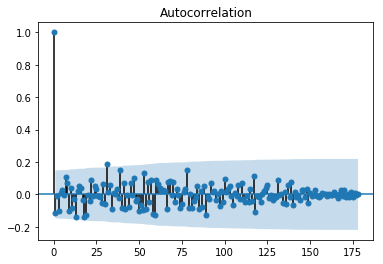

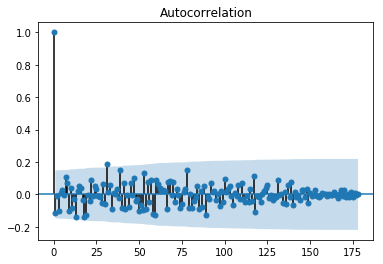

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(returns.loc[50].values)

# KMeans

In [18]:
X = train.loc[:,'Feature_1':'Feature_25'].values

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5,whiten=True)
X_r = pca.fit_transform(X)
pca.explained_variance_

array([  7.97613766e+08,   2.39959424e+01,   1.43957917e+01,
         7.75578885e+00,   6.71299846e+00])

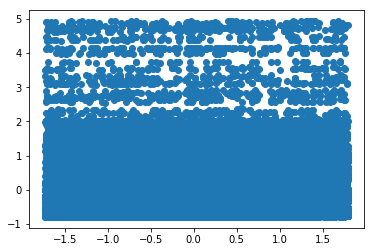

In [20]:
plt.scatter(X_r[:,0], X_r[:,1])

In [18]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=8,n_init=pca.components_)
#kmeans.fit(X)

# Some plots

import sys
sys.path.append('/Users/massil/Programmation/')
import finance

from finance.statphy.stiff_propagator import propagator
propagator = np.corrcoef(returns,rowvar=0)
plt.pcolor(propagator,cmap='RdBu')
plt.colorbar()
plt.show()
plt.close()

plt.plot(np.diag(propagator[::-1],k=0))

# naives plots

In [21]:
np.mean(returns.loc[200][:60])

2.7668796479551197e-05

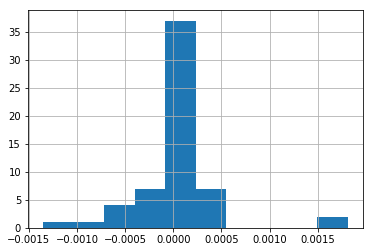

In [22]:
returns.loc[200][61:120].hist()

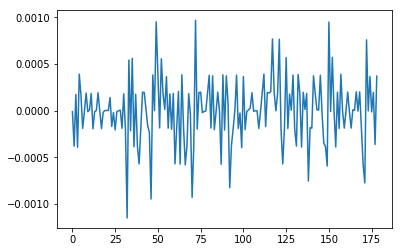

In [28]:
plt.plot(np.array(returns.loc[50]))

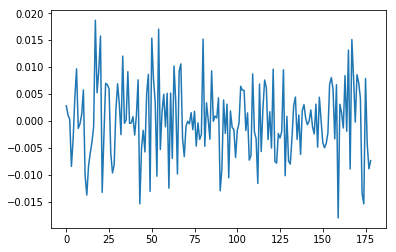

In [30]:
plt.plot(np.array(log_prices.loc[50]))

def get_cumulants(index, start, end, maxorder=6):
    from finance.statphy.cumulants import cumulant
    time_indices = np.arange(start,end)
    res = np.zeros(maxorder)
    for s in range(maxorder):
        res[s] = cumulant(returns.loc[index][time_indices],n=s+1)
    return res

ind=60
maxord=2

cumulants1 = np.array([get_cumulants(ind,start=0,end=60,maxorder=4) for ind in range(returns.shape[0])])

cumulants2 = np.array([get_cumulants(ind,start=61,end=120,maxorder=4) for ind in range(returns.shape[0])])

cumulants3 = np.array([get_cumulants(ind,start=121,end=179,maxorder=4) for ind in range(returns.shape[0])])

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (19.0, 12.0)

for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, 1+4*i+j)
        if i == 0:
            pd.Series(np.log(abs(cumulants1))[:,j]).hist(bins=20)
            plt.title("K_%s on 1:60" % int(j+1))
        elif i == 1:
            pd.Series(np.log(abs(cumulants2))[:,j]).hist(bins=20)
            plt.title("K_%s on 61:120" % int(j+1))
        elif i == 2:
            pd.Series(np.log(abs(cumulants3))[:,j]).hist(bins=20)
            plt.title("K_%s on 121:180" % int(j+1))